[Reference](https://medium.com/@hckkiu/61-lines-of-code-that-took-me-entire-day-8b256605789a)

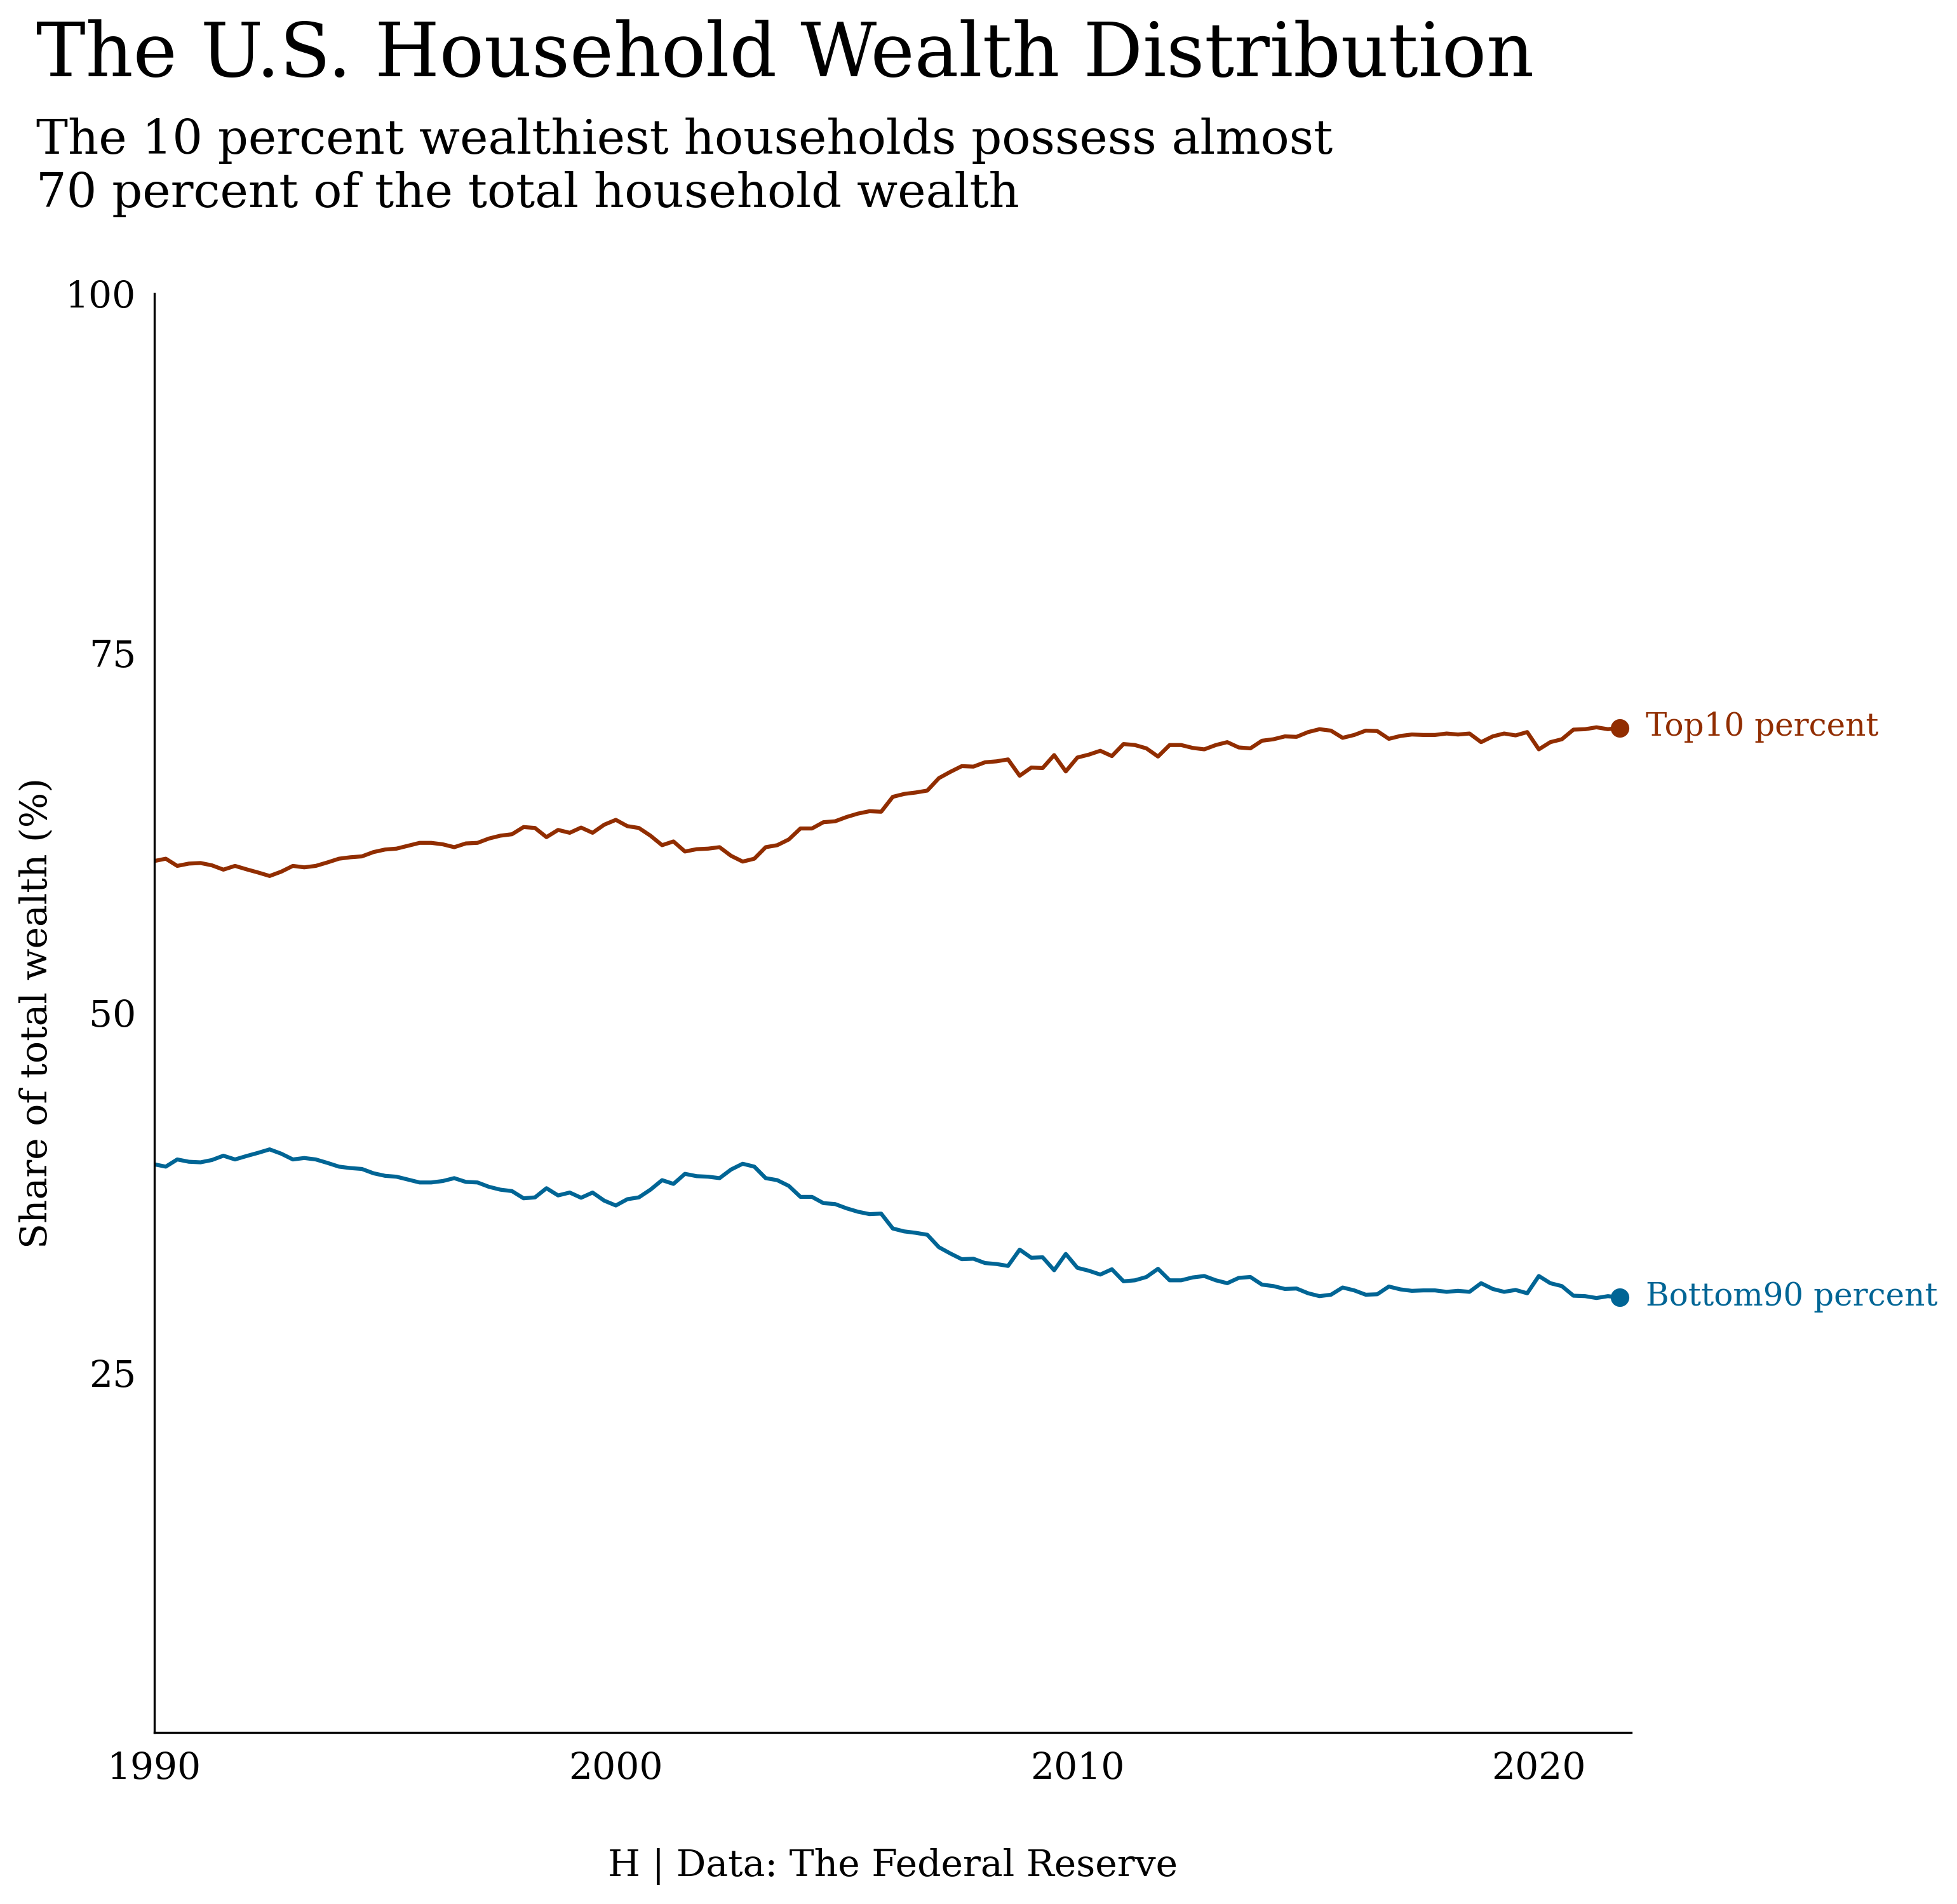

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime


df = pd.read_csv('https://raw.githubusercontent.com/hckkiu/data-viz/main/wealth/dfa-networth-shares.csv')
df['Datex'] = pd.to_datetime(df['Date'].str.replace(':', '-'))
df = df[['Net worth', 'Category', 'Datex']].groupby(['Datex', 'Category']).sum().unstack()
df = df.apply(lambda x: x/x.sum() * 100, axis=1)
df.loc[:, ('Net worth', 'Top10')] = df['Net worth']['Top1'] + df['Net worth']['Next9']
df.loc[:, ('Net worth', 'Bottom90')] = df['Net worth']['Next40'] + df['Net worth']['Bottom50']
df = df.stack()
df = df.reset_index()
plt_df = df[(df['Category'] == 'Top10') | (df['Category'] == 'Bottom90')]


plt.rcParams["font.family"] = "serif"

fig, ax = plt.subplots(figsize=(10, 10), facecolor='white', dpi=300)

COLORS = {
    'Top10': '#912d00', 
    'Bottom90': '#006595'
}

ax.tick_params(axis='y', left=False)
plt.ylim(0, 100)
plt.yticks([25, 50, 75, 100], fontsize=14)
plt.ylabel('Share of total wealth (%)', fontsize=14)

ax.tick_params(axis='x', bottom=False)
plt.xlim(datetime.date(1990,1,1), datetime.date(2022,1,1))
plt.xticks([datetime.date(i,1,1) for i in range(1990, 2021, 10)], fontsize=14)
date_form = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_form)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for k, v in COLORS.items():
    year = plt_df.loc[(plt_df['Category'] == k), 'Datex']
    worth = plt_df.loc[(plt_df['Category'] == k), 'Net worth']
    ax.plot(year, worth, c=v)
    ax.plot(year.iloc[-1], worth.iloc[-1], 'o', c=v)
    ax.annotate(k + ' percent', 
                xy=(year.iloc[-1], worth.iloc[-1]),
                xytext=(10, -3), 
                textcoords='offset points',
                c=v, 
                fontsize=12)

plt.title('The U.S. Household Wealth Distribution', 
             fontsize=28, 
             loc='left', 
             x=-0.08, y=1.14)

ax.text(s='The 10 percent wealthiest households possess almost \n70 percent of the total household wealth', 
        x=-.08, y=1.06, 
        fontsize=18, 
        transform=ax.transAxes)

ax.text(s='H | Data: The Federal Reserve', 
        x=0.5, y=-0.1,
        horizontalalignment='center',
        fontsize=14, 
        transform=ax.transAxes)

fig.savefig('wealth', bbox_inches='tight')